In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv("/content/drive/MyDrive/polynomialdata_train.csv")


In [ ]:
print(data.head())

         target  feature 1  feature 2  feature 3
0  4.131528e+06   5.221849   7.295111  95.716846
1  3.172975e-01  -5.106284   4.220085  -6.172360
2  4.676422e+04  -4.218053  -7.573823 -39.493884
3  1.404175e+05 -18.439122  -2.275148 -40.885857
4  4.788988e+03  13.353046   3.103837  18.622367


In [ ]:
np.random.seed(6)
data = data.iloc[np.random.permutation(len(data))]

target = data.iloc[:, 0]
df = data.iloc[:, 1:]  #features
poly_df = pd.DataFrame()
def gen_features(data , degree):
 poly_df = pd.DataFrame()
 for d in range(1 , degree + 1):
  for i in range(d+1):
    for j in range(d+1):
      for k in range(d+1):
        if i + j + k == d :
          col_name = f"Feature_{len(poly_df.columns) + 1}"
          poly_df[col_name] = df.iloc[:, 2]**(i)*df.iloc[: , 1]**(j)*df.iloc[: , 0]**(k)

 return poly_df
features  = gen_features(data , degree = 6)


print(features.head())

       Feature_1  Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
40282  -4.411792  -4.364674  -36.161755   19.463907   19.256033   19.050378   
31566  -7.543690  -4.048754  143.873072   56.907266   30.542550   16.392412   
40070   3.142110  12.623881  -24.237856    9.872856   39.665626  159.362379   
28003  24.379254   0.298607 -100.345640  594.348005    7.279825    0.089166   
3296   30.958364   5.488828  -69.880759  958.420307  169.925149   30.127237   

         Feature_7   Feature_8     Feature_9    Feature_10  ...    Feature_74  \
40282   159.538137  157.834271   1307.672557    -85.870706  ...  4.060631e+06   
31566 -1085.333925 -582.506730  20699.460924   -429.290801  ... -1.278469e+09   
40070   -76.158014 -305.975817    587.473663     31.021603  ... -4.417198e+05   
28003 -2446.351795  -29.963946  10069.247397  14489.760729  ... -1.464053e+10   
3296  -2163.393986 -383.563497   4883.320506  29671.124821  ... -1.012528e+10   

         Feature_75    Feature_76    F

In [ ]:
# Conversion to arrays
X = features.to_numpy()
y = target.to_numpy()

# Splitting
test_size = 0.1 # 10% for both CV and Test

split_index_train = int(len(features) * (1 - 2 * test_size))
split_index_cv = int(len(features) * (1 - test_size))

X_train = X[:split_index_train]
y_train = y[:split_index_train]

X_cv = X[split_index_train:split_index_cv]
y_cv = y[split_index_train:split_index_cv]

X_test = X[split_index_cv:]
y_test = y[split_index_cv:]


In [ ]:
def zscore(X):

  mu = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)

  X_norm = (X - mu)/std
  return X_norm , mu , std

X_train_norm, train_mu , train_std =  zscore(X_train)
X_test_norm  =  (X_test - train_mu)/train_std
X_cv_norm    =  (X_cv - train_mu)/train_std

In [ ]:
def predict(X ,w ,b):
  y = np.dot(X ,w) + b
  return y

In [ ]:
def compute_cost(X, y, W, b, reg_parameter):
    m = X.shape[0]

    f_wb = np.dot(X, W) + b

    cost = np.sum((f_wb - y) ** 2) / (2 * m)
    regularization_cost = (reg_parameter / (2 * m)) * np.sum(W ** 2)

    total_cost = regularization_cost + cost
    return total_cost

In [ ]:
def compute_gradient(X, y, W, b, reg_parameter):
    m = X.shape[0]


    f_wb = np.dot(X, W) + b
    errors = f_wb - y

    dj_dw = np.dot(errors, X) / m
    dj_db = np.sum(errors) / m

    dj_dw += (reg_parameter / m) * W

    return dj_dw, dj_db

In [ ]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, reg_parameter):
    W = w_in
    b = b_in
    J_history = []  #empty list to store cost at each iteration

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, W, b, reg_parameter)
        W -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 1000 == 0:
            cost = compute_cost(X, y, W, b, reg_parameter)
            print(f"Iteration {i}, Cost: {cost}")
            J_history.append(cost)


    cost = compute_cost(X, y, W, b, reg_parameter)
    print(f"Iteration {num_iters}, Cost: {cost}")
    J_history.append(cost)

    return W, b, J_history

In [ ]:
w_in  = np.zeros(X.shape[1],)
b_in  = 0.
alph = 0.1
iters = 40000

W_out, b_out , cost = gradient_descent(X_train_norm, y_train, w_in, b_in,iters, alph , 0)
print(f"\nupdated parameters: w:{W_out}, b:{b_out}")
print(f"\ncost = {cost[-1]}")

Iteration 0, Cost: 35840524001390.57
Iteration 1000, Cost: 15320453605.777798
Iteration 2000, Cost: 1489308076.6595654
Iteration 3000, Cost: 153042712.360057
Iteration 4000, Cost: 16285135.525732594
Iteration 5000, Cost: 1807299.6161469857
Iteration 6000, Cost: 211014.46264631842
Iteration 7000, Cost: 26076.67270073744
Iteration 8000, Cost: 3413.6418235002557
Iteration 9000, Cost: 471.13992266020875
Iteration 10000, Cost: 67.96844554816363
Iteration 11000, Cost: 10.148374648891057
Iteration 12000, Cost: 1.5540509716040023
Iteration 13000, Cost: 0.24228623274083239
Iteration 14000, Cost: 0.038249344870972764
Iteration 15000, Cost: 0.006090918868555491
Iteration 16000, Cost: 0.0009757950354495607
Iteration 17000, Cost: 0.00015698998775585818
Iteration 18000, Cost: 2.5333371738905452e-05
Iteration 19000, Cost: 4.096931227423143e-06
Iteration 20000, Cost: 6.636163482804867e-07
Iteration 21000, Cost: 1.0761949231171914e-07
Iteration 22000, Cost: 1.746848539921188e-08
Iteration 23000, Cost: 

Text(0.5, 1.0, 'Cost vs No. Of Iterations')

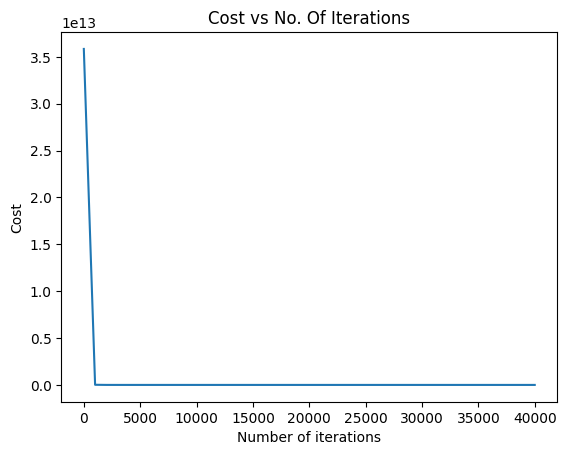

In [ ]:
plt.plot(range(0, 40001 ,1000) , cost)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs No. Of Iterations")

In [ ]:
def r2score(y_train , y_pred):
  sst = np.sum((y_train - np.mean(y_train))**2)
  ssr = sum((y_train[i] - y_pred[i]) ** 2 for i in range(len(y_train)))
  r2 = 1 - (ssr/sst)
  return r2


In [ ]:
y_pred_train = predict(X_train_norm , W_out , b_out)
r2_train = r2score(y_train, y_pred_train)
print(f'Cost on training set : {cost[-1]}')
print(f"\nR2 score on training set : {r2_train}")

Cost on training set : 1.1742600708820613e-15

R2 score on training set : 1.0


In [ ]:
cost_cv= compute_cost(X_cv_norm , y_cv , W_out ,b_out, 0)
y_cv_pred = predict(X_cv_norm , W_out , b_out)
r2_cv = r2score(y_cv, y_cv_pred)
print(f'Cost on cross validation set = {cost_cv}')
print(f'\nR2 score on cross validation set : {r2_cv}')


Cost on cross validation set = 7.420624551148468e-16

R2 score on cross validation set : 1.0


In [ ]:
cost_test = compute_cost(X_test_norm , y_test , W_out ,b_out , 0)
y_test_pred = predict(X_test_norm , W_out , b_out)
r2_test = r2score(y_test, y_test_pred)
print(f'Cost on test set = {cost_test}')
print(f'\nR2 score on test set: {r2_test}')

Cost on test set = 1.3043303141224729e-15

R2 score on test set: 1.0


In [3]:
test_data = pd.read_csv("/content/drive/MyDrive/Polynomialdata_test.csv")
test_data.head()

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226


In [ ]:
features  = gen_features(test_data , degree = 6)
X = features.to_numpy()
X = X - train_mu/train_std
y_pred = predict(X , W_out ,b_out)